In [1]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from models.UNet2 import *
import cv2


In [2]:
images = np.load("/media/bot/DANE/MED_DATASETS/TRZUSTKA/images_smaller.npy")
labels = np.load("/media/bot/DANE/MED_DATASETS/TRZUSTKA/labels_smaller.npy")

In [24]:
file_imgs = os.path.join("/media/bot/DANE/MED_DATASETS/TRZUSTKA/", "images_smaller")
file_lab = os.path.join("/media/bot/DANE/MED_DATASETS/TRZUSTKA/", "labels_smaller")

np.save(file_imgs, new_images)
np.save(file_lab, new_labels)

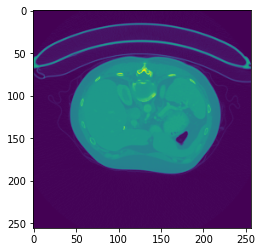

In [46]:
tmp = images[100]
tmp2 = cv2.resize(tmp, dsize=(IMG_H, IMG_W))
img = (tmp2 - np.min(tmp2)) / (np.max(tmp2) - np.min(tmp2))
plt.imshow(img)

In [5]:
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)

print(x_train.shape, y_train.shape)

(600, 256, 256, 1) (600, 256, 256, 1)


In [4]:
loaded_model = tf.keras.models.load_model('saved_models/UNet_test', custom_objects={"dice_coef_multilabel": dice_coef_multilabel, "iou_multilabel": iou_multilabel})
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           activation[0][0]                 
______________________________________________________________________________________________

In [5]:
seg_model2 = UNet2(img_shape = (256, 256, 1), num_of_class = 1, vgg=11, loaded_model = loaded_model, path = "saved_models/UNet_pancreas", learning_rate = 2e-4)
x_train, x_test_valid, y_train, y_test_valid = train_test_split(images, labels, test_size=0.4, random_state=4)
x_valid, x_test, y_valid, y_test = train_test_split(x_test_valid, y_test_valid, test_size=0.5, random_state=4)


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from data_utils import *


o = Conv2D(1, (1,1), activation ='sigmoid', padding = 'same', kernel_initializer = 'glorot_normal', name='sigmoid')(loaded_model.layers[-2].output)
from tensorflow.keras.models import Model

model2 = Model(inputs=loaded_model.input, outputs=o)
model2.summary()
model2.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 2e-4), metrics = [dice_coef_multilabel, iou_multilabel])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           activation[0][0]                 
____________________________________________________________________________________________

In [6]:
seg_model2.show_model()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           activation[0][0]                 
______________________________________________________________________________________________

In [13]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="saved_models/UNet_pancreas",
    save_weights_only=False,
    monitor='val_dice_coef_multilabel',
    mode='max',
    save_best_only=True,
    save_freq="epoch")



history = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs = 20, batch_size = 2, callbacks=[model_checkpoint_callback])


Epoch 1/20


ValueError: in user code:

    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/bot/repo/MED/MED/MULTIPLE_ORGANS_SEGMENTATION/data_utils.py:20 dice_coef_multilabel  *
        dice += dice_coef(y_true[:,:,:,index], y_pred[:,:,:,index])
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:1036 _slice_helper
        return strided_slice(
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:1209 strided_slice
        op = gen_array_ops.strided_slice(
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py:10474 strided_slice
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3528 _create_op_internal
        ret = Operation(
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: slice index 1 of dimension 3 out of bounds. for '{{node strided_slice_3}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=7, ellipsis_mask=0, end_mask=7, new_axis_mask=0, shrink_axis_mask=8](Cast_1, strided_slice_3/stack, strided_slice_3/stack_1, strided_slice_3/stack_2)' with input shapes: [2,256,256,1], [4], [4], [4] and with computed input tensors: input[1] = <0 0 0 1>, input[2] = <0 0 0 2>, input[3] = <1 1 1 1>.


In [ ]:
history = seg_model2.train(x_train, y_train, x_valid, y_valid, epoch = 100, batch_size = 16)

Epoch 1/100
38/38 [==============================] - 463s 12s/step - loss: 12.4651 - dice_coef_multilabel: 5.8264e-12 - iou_multilabel: 0.0000e+00 - val_loss: 9.4676e-05 - val_dice_coef_multilabel: 1.1927e-09 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 2/100
38/38 [==============================] - 451s 12s/step - loss: 2.9170e-05 - dice_coef_multilabel: 1.1132e-08 - iou_multilabel: 0.0000e+00 - val_loss: 2.1475e-06 - val_dice_coef_multilabel: 5.0808e-08 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 3/100
38/38 [==============================] - 449s 12s/step - loss: 1.7856e-06 - dice_coef_multilabel: 5.7450e-08 - iou_multilabel: 0.0000e+00 - val_loss: 1.1558e-06 - val_dice_coef_multilabel: 9.1830e-08 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 4/100
38/38 [==============================] - 474s 13s

38/38 [==============================] - 442s 12s/step - loss: 1.3079e-08 - dice_coef_multilabel: 7.3072e-06 - iou_multilabel: 0.0000e+00 - val_loss: 1.2321e-08 - val_dice_coef_multilabel: 8.3381e-06 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 28/100
38/38 [==============================] - 442s 12s/step - loss: 1.2069e-08 - dice_coef_multilabel: 7.9186e-06 - iou_multilabel: 0.0000e+00 - val_loss: 1.1411e-08 - val_dice_coef_multilabel: 9.0026e-06 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 29/100
38/38 [==============================] - 440s 12s/step - loss: 1.1191e-08 - dice_coef_multilabel: 8.5393e-06 - iou_multilabel: 0.0000e+00 - val_loss: 1.0598e-08 - val_dice_coef_multilabel: 9.6927e-06 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 30/100
38/38 [==============================] - 440s 12s/step 

38/38 [==============================] - 469s 12s/step - loss: 3.1610e-09 - dice_coef_multilabel: 3.0215e-05 - iou_multilabel: 0.0000e+00 - val_loss: 3.0709e-09 - val_dice_coef_multilabel: 3.3449e-05 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 54/100
38/38 [==============================] - 513s 14s/step - loss: 3.0405e-09 - dice_coef_multilabel: 3.1414e-05 - iou_multilabel: 0.0000e+00 - val_loss: 2.9566e-09 - val_dice_coef_multilabel: 3.4731e-05 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 55/100
38/38 [==============================] - 498s 13s/step - loss: 2.9251e-09 - dice_coef_multilabel: 3.2654e-05 - iou_multilabel: 0.0000e+00 - val_loss: 2.8485e-09 - val_dice_coef_multilabel: 3.6051e-05 - val_iou_multilabel: 0.0000e+00
INFO:tensorflow:Assets written to: saved_models/UNet_pancreas/assets
Epoch 56/100
38/38 [==============================] - 497s 13s/step 

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from data_utils import *


o = Conv2D(1, (1,1), activation ='sigmoid', padding = 'same', kernel_initializer = 'glorot_normal', name='sigmoid')(loaded_model.layers[-3].output)


In [9]:
from tensorflow.keras.models import Model

model2 = Model(inputs=loaded_model.input, outputs=o)
model2.summary()
model2.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 2e-4), metrics = [dice_coef_multilabel, iou_multilabel])

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 128, 128, 64) 0           activation[0][0]                 
____________________________________________________________________________________________

In [10]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="saved_models/UNet_pancreas",
    save_weights_only=False,
    monitor='val_dice_coef_multilabel',
    mode='max',
    save_best_only=True,
    save_freq="epoch")



history = model2.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs = 20, batch_size = 16, callbacks=[model_checkpoint_callback])


Epoch 1/20


ValueError: in user code:

    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/bot/repo/MED/MED/MULTIPLE_ORGANS_SEGMENTATION/data_utils.py:20 dice_coef_multilabel  *
        dice += dice_coef(y_true[:,:,:,index], y_pred[:,:,:,index])
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:1036 _slice_helper
        return strided_slice(
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:1209 strided_slice
        op = gen_array_ops.strided_slice(
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py:10474 strided_slice
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3528 _create_op_internal
        ret = Operation(
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /home/bot/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: slice index 1 of dimension 3 out of bounds. for '{{node strided_slice_3}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=7, ellipsis_mask=0, end_mask=7, new_axis_mask=0, shrink_axis_mask=8](Cast_1, strided_slice_3/stack, strided_slice_3/stack_1, strided_slice_3/stack_2)' with input shapes: [?,256,256,1], [4], [4], [4] and with computed input tensors: input[1] = <0 0 0 1>, input[2] = <0 0 0 2>, input[3] = <1 1 1 1>.


In [14]:
preds = model2.predict(x_test)

In [17]:
print("TEST DICE_COEF: ", dice_coef(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou(y_test.astype('float32'), preds).numpy())

TEST DICE_COEF:  0.78772396
TEST IoU:  0.6497893


In [6]:
print("TEST DICE_COEF: ", dice_coef_multilabel(y_test.astype('float32'), preds).numpy())
print("TEST IoU: ", iou_multilabel(y_test.astype('float32'), preds, 5).numpy())


TEST DICE_COEF:  0.0859932
TEST IoU:  0.053035688
